# Create models to scale the usability of the model

In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

#plot stuff
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.inspection import DecisionBoundaryDisplay
from mycolorpy import colorlist as mcp
from collections import Counter
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import seaborn as sns

#machine learning models
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier

## load in train and predict data

In [2]:
usabilityTrainData = pd.read_csv('PathUsababilityTrainData.csv')
usabilityPredictData = pd.read_csv('PathUsababilityPredictData.csv') 

In [3]:
usabilityTrainData

,Unnamed: 0,0,1,2,3,4
0,0,ABOUT1_SBS1A3c7a_950_1280.mp4,D:/Thesis/Video-Auslan-sorted/ABOUT1/ABOUT1_SB...,9,10.433333,3
1,1,ABOUT2_AAPB2c7a_310_800.mp4,D:/Thesis/Video-Auslan-sorted/ABOUT2/ABOUT2_AA...,13,14.125000,2
2,2,ABOUT2_AJPB2c7a_1135_2270.mp4,D:/Thesis/Video-Auslan-sorted/ABOUT2/ABOUT2_AJ...,28,11.273684,3
3,3,ABOUT2_AMGA1c2a_1580_1820.mp4,D:/Thesis/Video-Auslan-sorted/ABOUT2/ABOUT2_AM...,6,13.614035,1
4,4,ABOUT2_AMGA1c2a_730_1170.mp4,D:/Thesis/Video-Auslan-sorted/ABOUT2/ABOUT2_AM...,11,13.614035,3
...,...,...,...,...,...,...
1196,1196,GUFFAW_SPKA1c2a_94460_95534.mp4,D:/Thesis/Video-Auslan-sorted/GUFFAW/GUFFAW_SP...,27,14.893939,2
1197,1197,GUFFAW_SPKA1c2a_97627_98347.mp4,D:/Thesis/Video-Auslan-sorted/GUFFAW/GUFFAW_SP...,18,14.893939,3
1198,1198,GUFFAW_STCA1c2b_11788_13018.mp4,D:/Thesis/Video-Auslan-sorted/GUFFAW/GUFFAW_ST...,31,10.267123,3
1199,1199,HALF_ACAA2c6ii_4780_5050.mp4,D:/Thesis/Video-Auslan-sorted/HALF/HALF_ACAA2c...,7,10.360000,1


In [4]:
usabilityPredictData

,Unnamed: 0,0,1,2,3
0,0,AGAIN_SASA2c7a_91890_92050.mp4,D:/Thesis/Video-Auslan-sorted/AGAIN/AGAIN_SASA...,4,10.689873
1,1,AGAIN_SGMB1c2a_49780_50510.mp4,D:/Thesis/Video-Auslan-sorted/AGAIN/AGAIN_SGMB...,18,11.873874
2,2,AGAIN_SGMB1c2a_88595_88950.mp4,D:/Thesis/Video-Auslan-sorted/AGAIN/AGAIN_SGMB...,9,11.873874
3,3,AGAIN_SLRB1c2b_26330_26550.mp4,D:/Thesis/Video-Auslan-sorted/AGAIN/AGAIN_SLRB...,5,15.806250
4,4,AGAIN_SMGB1c2a_121717_122687.mp4,D:/Thesis/Video-Auslan-sorted/AGAIN/AGAIN_SMGB...,25,16.389313
...,...,...,...,...,...
12696,12696,ZOOM-OFF_STBA1c2b_36540_37860.mp4,D:/Thesis/Video-Auslan-sorted/ZOOM-OFF/ZOOM-OF...,33,18.894737
12697,12697,ZOOM-OFF(7)_AASB2c6iii_31980_32880.mp4,D:/Thesis/Video-Auslan-sorted/ZOOM-OFF(7)/ZOOM...,23,11.617021
12698,12698,ZOOM-OFF(7)_ARGB2c6iii_41620_42200.mp4,D:/Thesis/Video-Auslan-sorted/ZOOM-OFF(7)/ZOOM...,15,13.710526
12699,12699,ZOOM-OFF(S)_MCDB2c6iii_41420_42210.mp4,D:/Thesis/Video-Auslan-sorted/ZOOM-OFF(S)/ZOOM...,20,11.804348


# Data selection

In [45]:
data = np.array(usabilityTrainData)
X = np.array([data.T[3], data.T[4]], dtype=int).T
y = np.array([data.T[5]],dtype=int).T
newY = []
for i in y:
    if i >= 3:
        newY.append(1)
    else:
        newY.append(0)
# y = np.array(newY).reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

## Linear Discriminant Analysis
Quadratic discriminant analysis is a classification problem represented by a Bayes Probability distribution 

In [46]:
# data to manipulate
xTrain = X_train
xTest = X_test
yTrain = y_train
yTest = y_test

# Linear Discriminant Analysis
X = xTrain
y = yTrain
clf = LinearDiscriminantAnalysis()
clf.fit(X, y.ravel())

# Error calculation
print("training acuracy: ", clf.score(X, y))
print("validation acuracy: ", clf.score(xTest, yTest))
print("training error: ", 1 - clf.score(X, y))
print("validation error: ", 1- clf.score(xTest, yTest))

# Confusion matrix
yPredictTrain = clf.predict(X)
yPredictTest = clf.predict(xTest)

cfTrain = confusion_matrix(yTrain, yPredictTrain)
cfTest = confusion_matrix(yTest, yPredictTest)
# pd.DataFrame(cfTest).to_csv("kneighbourConfusionMatrix.csv")


training acuracy:  0.5010416666666667
validation acuracy:  0.4896265560165975
training error:  0.4989583333333333
validation error:  0.5103734439834025


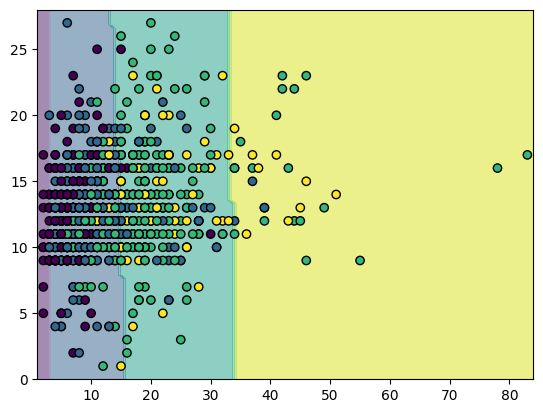

In [47]:
# ploting graph
disp = DecisionBoundaryDisplay.from_estimator(clf, X, response_method="predict", alpha=0.5)
disp.ax_.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k")

## Gaussian Naive Bayes
models each as conforming to a Gaussian (normal) distribution

In [48]:
# data to manipulate
xTrain = X_train
xTest = X_test
yTrain = y_train
yTest = y_test

# Gaussian Naive Bayes
X = xTrain
y = yTrain
clf = GaussianNB()
clf.fit(X, y.ravel())

# Error calculation
print("training acuracy: ", clf.score(X, y))
print("validation acuracy: ", clf.score(xTest, yTest))
print("training error: ", 1 - clf.score(X, y))
print("validation error: ", 1- clf.score(xTest, yTest))

# Confusion matrix
yPredictTrain = clf.predict(X)
yPredictTest = clf.predict(xTest)

cfTrain = confusion_matrix(yTrain, yPredictTrain)
cfTest = confusion_matrix(yTest, yPredictTest)
pd.DataFrame(cfTest).to_csv("GaussianNaiveBayesConfusion.csv")

training acuracy:  0.49270833333333336
validation acuracy:  0.5062240663900415
training error:  0.5072916666666667
validation error:  0.49377593360995853


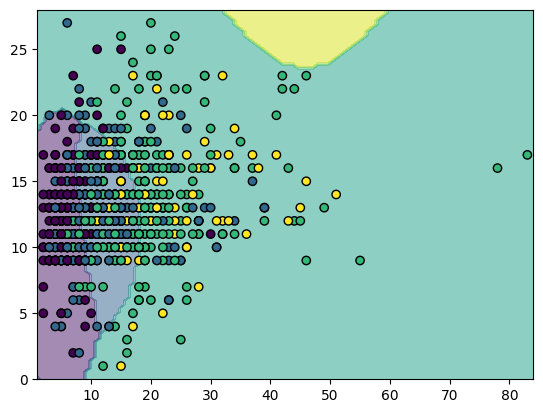

In [49]:
# ploting graph
disp = DecisionBoundaryDisplay.from_estimator(clf, X, response_method="predict", alpha=0.5)
disp.ax_.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k")

## KNeighbors Classifier
Classifier implementing the k-nearest neighbors vote.

In [75]:
# data to manipulate
xTrain = X_train
xTest = X_test
yTrain = y_train
yTest = y_test
# make = pd.DataFrame(data1Make)
# make = make.drop(0, axis=1)
# make = make.drop(10, axis=1)

# KNeighbors Classifier
X = xTrain
y = yTrain

bottom = 10
top = 30
step = 1
predictClass = []
kNeighborsPredictions = []
for i in range(bottom, top,step):
    print("\nNumber of Neigbours: ", i)
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X, y)
    kNeighborsPredictions.append(clf)
    # Error calculation
    print("training acuracy: ", clf.score(X, y))
    print("validation acuracy: ", clf.score(xTest, yTest))
    print("training error: ", 1 - clf.score(X, y))
    print("validation error: ", 1- clf.score(xTest, yTest))
    
    # predictClass = clf.predict(make)
    
    # Confusion matrix
    # yPredictTrain = clf.predict(X)
    # yPredictTest = clf.predict(xTest)

    # cfTrain = confusion_matrix(yTrain, yPredictTrain)
    # cfTest = confusion_matrix(yTest, yPredictTest)
# predictdf = pd.concat([make , pd.DataFrame(predictClass,columns=['class'])] , axis = 1)
# predictdf.to_csv("predict.csv")
# pd.DataFrame(cfTest).to_csv("kneighbourConfusionMatrix.csv")


Number of Neigbours:  10
training acuracy:  0.59375
validation acuracy:  0.5311203319502075
training error:  0.40625
validation error:  0.46887966804979253

Number of Neigbours:  11
training acuracy:  0.5864583333333333
validation acuracy:  0.4979253112033195
training error:  0.4135416666666667
validation error:  0.5020746887966805

Number of Neigbours:  12
training acuracy:  0.5822916666666667
validation acuracy:  0.5311203319502075


C:\Users\KAI\AppData\Roaming\Python\Python39\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\KAI\AppData\Roaming\Python\Python39\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\KAI\AppData\Roaming\Python\Python39\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


training error:  0.41770833333333335
validation error:  0.46887966804979253

Number of Neigbours:  13
training acuracy:  0.590625
validation acuracy:  0.5228215767634855
training error:  0.40937500000000004
validation error:  0.4771784232365145

Number of Neigbours:  14
training acuracy:  0.5833333333333334
validation acuracy:  0.5311203319502075
training error:  0.41666666666666663
validation error:  0.46887966804979253

Number of Neigbours:  15
training acuracy:  0.5833333333333334
validation acuracy:  0.5394190871369294
training error:  0.41666666666666663
validation error:  0.46058091286307057

Number of Neigbours:  16


C:\Users\KAI\AppData\Roaming\Python\Python39\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\KAI\AppData\Roaming\Python\Python39\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\KAI\AppData\Roaming\Python\Python39\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\KAI\AppData\Roaming\Python\Python39\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when

training acuracy:  0.5802083333333333
validation acuracy:  0.5352697095435685
training error:  0.4197916666666667
validation error:  0.46473029045643155

Number of Neigbours:  17
training acuracy:  0.58125
validation acuracy:  0.5311203319502075
training error:  0.41874999999999996
validation error:  0.46887966804979253

Number of Neigbours:  18
training acuracy:  0.575
validation acuracy:  0.5518672199170125
training error:  0.42500000000000004
validation error:  0.4481327800829875

Number of Neigbours:  19


C:\Users\KAI\AppData\Roaming\Python\Python39\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\KAI\AppData\Roaming\Python\Python39\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\KAI\AppData\Roaming\Python\Python39\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


training acuracy:  0.5708333333333333
validation acuracy:  0.5435684647302904
training error:  0.4291666666666667
validation error:  0.4564315352697096

Number of Neigbours:  20
training acuracy:  0.575
validation acuracy:  0.5352697095435685
training error:  0.42500000000000004
validation error:  0.46473029045643155

Number of Neigbours:  21
training acuracy:  0.5697916666666667
validation acuracy:  0.5394190871369294
training error:  0.4302083333333333
validation error:  0.46058091286307057

Number of Neigbours:  22


C:\Users\KAI\AppData\Roaming\Python\Python39\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\KAI\AppData\Roaming\Python\Python39\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\KAI\AppData\Roaming\Python\Python39\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


training acuracy:  0.5739583333333333
validation acuracy:  0.5269709543568465
training error:  0.42604166666666665
validation error:  0.4730290456431535

Number of Neigbours:  23
training acuracy:  0.56875
validation acuracy:  0.5186721991701245
training error:  0.43125
validation error:  0.4813278008298755

Number of Neigbours:  24
training acuracy:  0.5708333333333333
validation acuracy:  0.5269709543568465
training error:  0.4291666666666667
validation error:  0.4730290456431535

Number of Neigbours:  25


C:\Users\KAI\AppData\Roaming\Python\Python39\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\KAI\AppData\Roaming\Python\Python39\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\KAI\AppData\Roaming\Python\Python39\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\KAI\AppData\Roaming\Python\Python39\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when

training acuracy:  0.5677083333333334
validation acuracy:  0.5477178423236515
training error:  0.43229166666666663
validation error:  0.4522821576763485

Number of Neigbours:  26
training acuracy:  0.5739583333333333
validation acuracy:  0.5435684647302904
training error:  0.42604166666666665
validation error:  0.4564315352697096

Number of Neigbours:  27
training acuracy:  0.55625
validation acuracy:  0.5435684647302904
training error:  0.44375
validation error:  0.4564315352697096

Number of Neigbours:  28
training acuracy:  0.5625


C:\Users\KAI\AppData\Roaming\Python\Python39\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\KAI\AppData\Roaming\Python\Python39\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\KAI\AppData\Roaming\Python\Python39\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


validation acuracy:  0.5311203319502075
training error:  0.4375
validation error:  0.46887966804979253

Number of Neigbours:  29
training acuracy:  0.5708333333333333
validation acuracy:  0.5477178423236515
training error:  0.4291666666666667
validation error:  0.4522821576763485


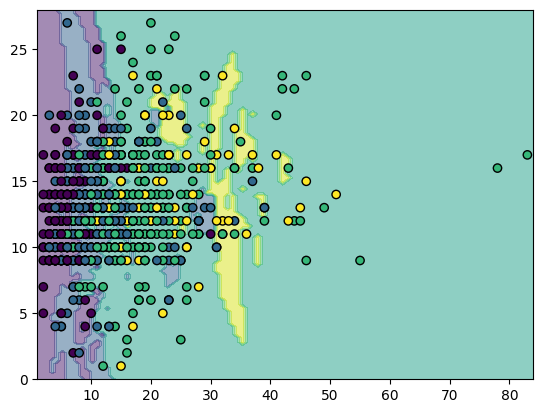

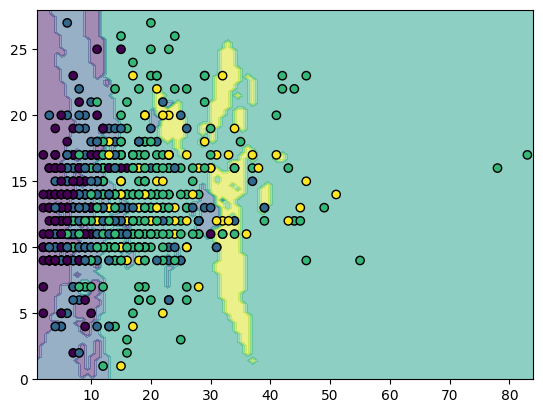

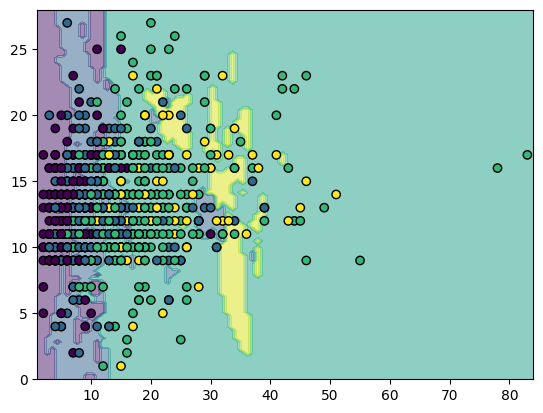

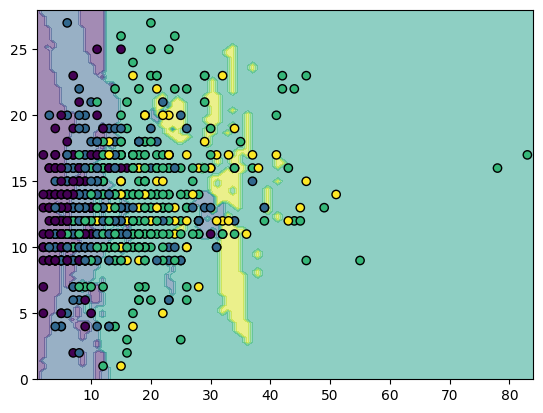

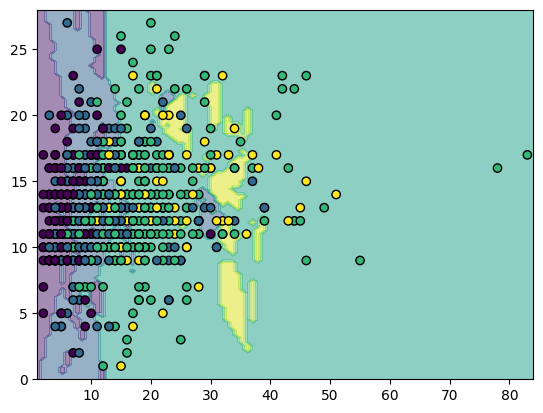

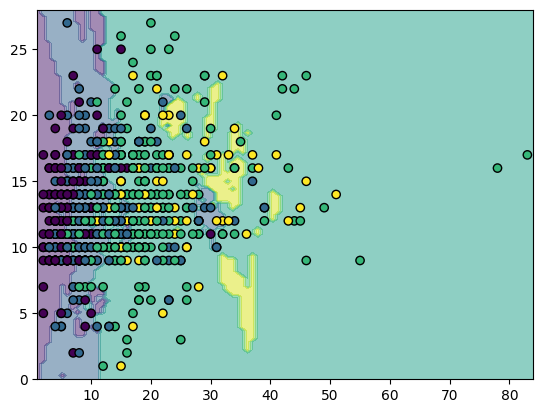

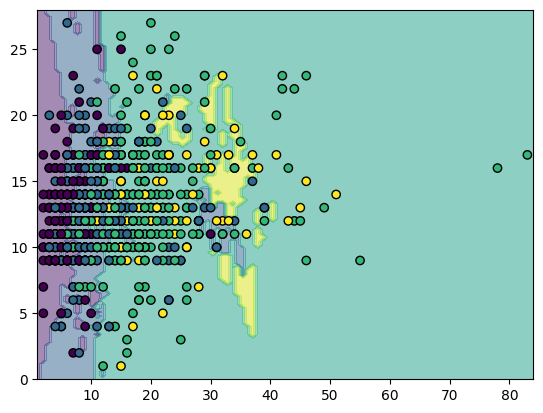

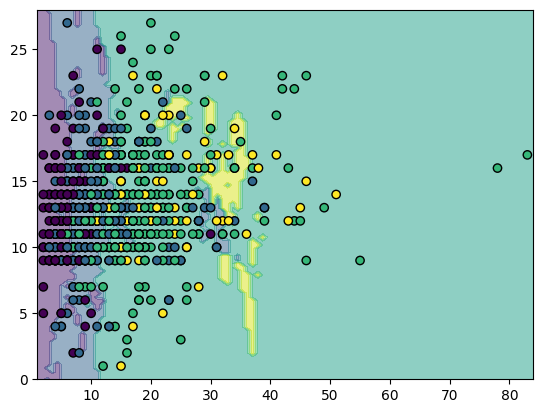

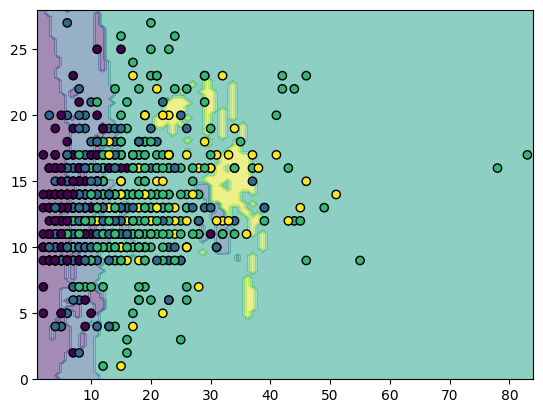

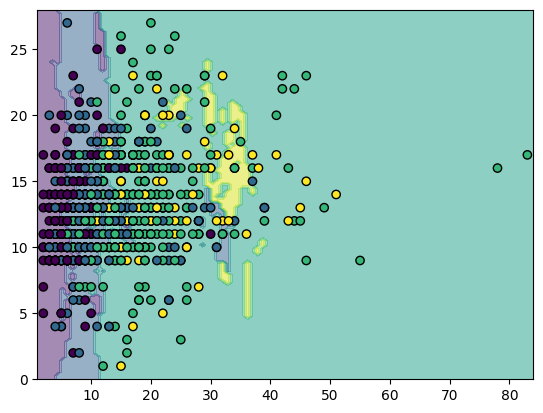

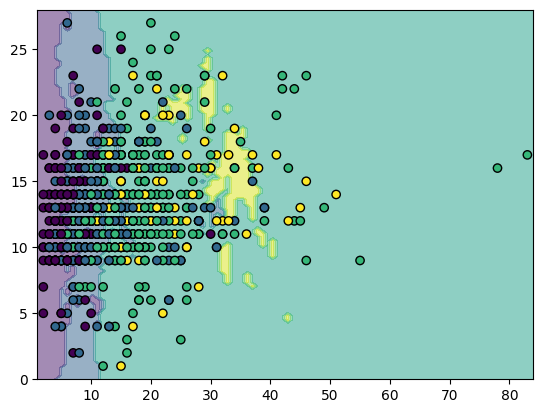

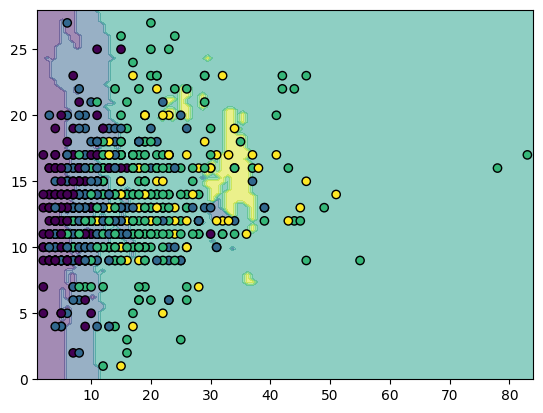

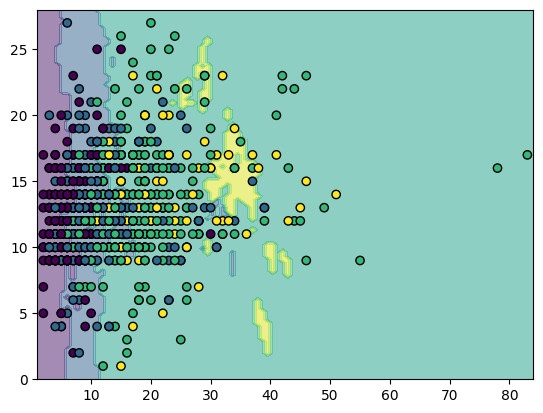

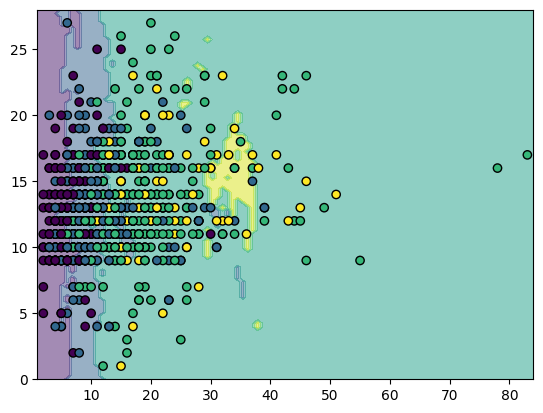

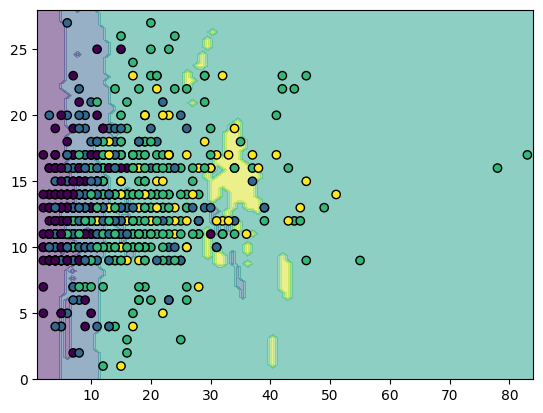

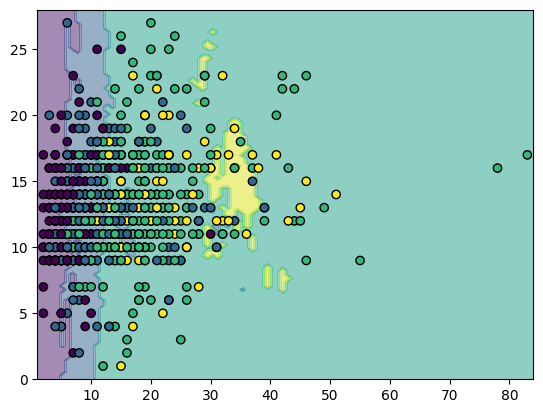

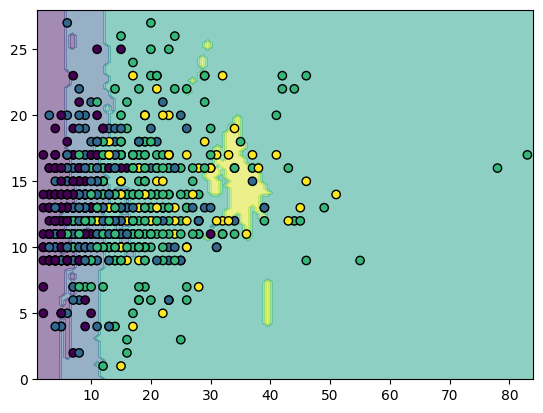

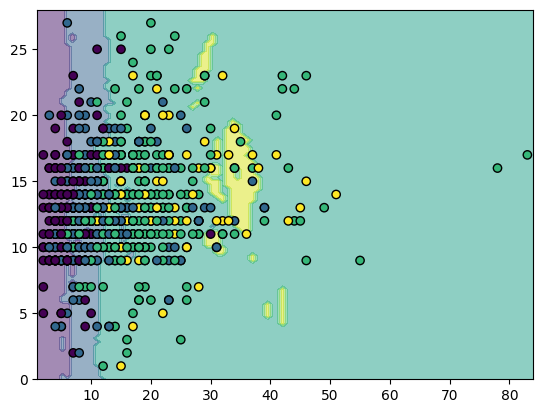

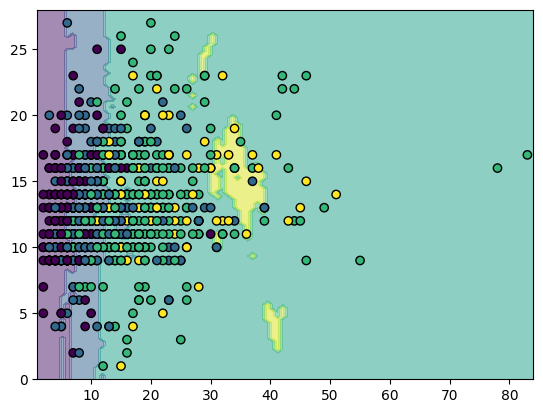

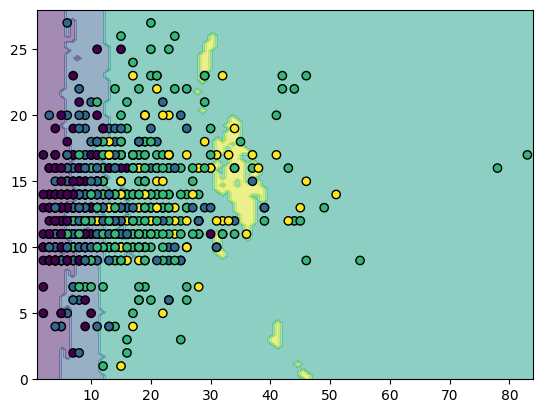

In [76]:
n = 0
for i in range(bottom, top,step):
    # ploting graph
    disp = DecisionBoundaryDisplay.from_estimator(kNeighborsPredictions[n], X, response_method="predict", alpha=0.5)
    disp.ax_.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k")
    n += 1

## DecisionTreeClassifier
A decision tree classifier.

In [54]:
# data to manipulate
xTrain = X_train
xTest = X_test
yTrain = y_train
yTest = y_test


# Quadratic model
X = xTrain
y = yTrain
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X, y)

# Error calculation
print("training acuracy: ", clf.score(X, y))
print("validation acuracy: ", clf.score(xTest, yTest))
print("training error: ", 1 - clf.score(X, y))
print("validation error: ", 1- clf.score(xTest, yTest))

# Confusion matrix
yPredictTrain = clf.predict(X)
yPredictTest = clf.predict(xTest)

cfTrain = confusion_matrix(yTrain, yPredictTrain)
cfTest = confusion_matrix(yTest, yPredictTest)
# pd.DataFrame(cfTest).to_csv("DecisionTreeClassifier.csv")

training acuracy:  0.6885416666666667
validation acuracy:  0.4896265560165975
training error:  0.3114583333333333
validation error:  0.5103734439834025


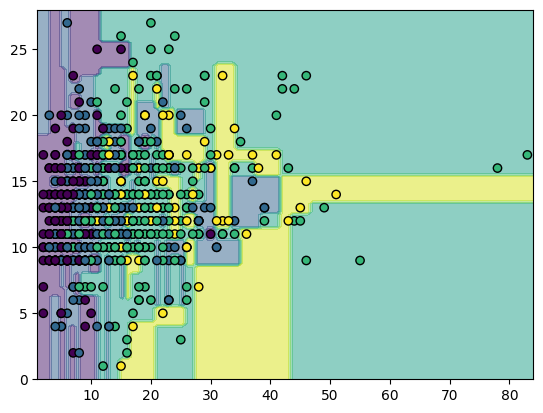

In [56]:
# ploting graph
disp = DecisionBoundaryDisplay.from_estimator(clf, X, response_method="predict", alpha=0.5)
disp.ax_.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k")

## RandomForestClassifier
A random forest classifier.

In [57]:
# data to manipulate
xTrain = X_train
xTest = X_test
yTrain = y_train
yTest = y_test


# RandomForestClassifier
X = xTrain
y = yTrain
clf = RandomForestClassifier(random_state=0)
clf.fit(X, y.ravel())

# Error calculation
print("training acuracy: ", clf.score(X, y))
print("validation acuracy: ", clf.score(xTest, yTest))
print("training error: ", 1 - clf.score(X, y))
print("validation error: ", 1- clf.score(xTest, yTest))

# Confusion matrix
yPredictTrain = clf.predict(X)
yPredictTest = clf.predict(xTest)

cfTrain = confusion_matrix(yTrain, yPredictTrain)
cfTest = confusion_matrix(yTest, yPredictTest)
# pd.DataFrame(cfTest).to_csv("DecisionTreeClassifier.csv")

training acuracy:  0.6885416666666667
validation acuracy:  0.5103734439834025
training error:  0.3114583333333333
validation error:  0.48962655601659755


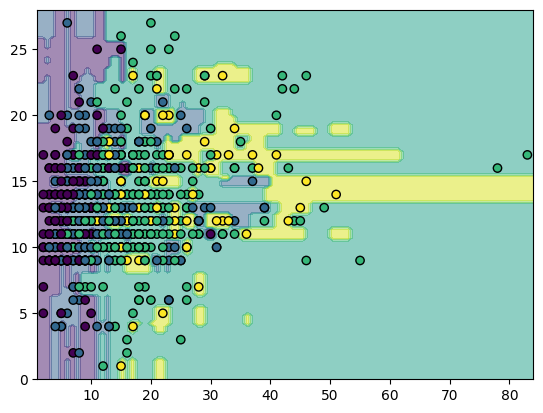

In [59]:
# ploting graph
disp = DecisionBoundaryDisplay.from_estimator(clf, X, response_method="predict", alpha=0.5)
disp.ax_.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k")

## MLP NeuralNetwork
Multi-layer Perceptron classifier.

This model optimizes the log-loss function using LBFGS or stochastic gradient descent.

In [67]:
# data to manipulate
xTrain = X_train
xTest = X_test
yTrain = y_train
yTest = y_test

# MLP NeuralNetwork
X = xTrain
y = yTrain

activation = ['identity', 'logistic', 'tanh', 'relu']
classifiers = []
for func in activation:
    clf = MLPClassifier(random_state=1, max_iter=9999999, activation=func,hidden_layer_sizes=(1000,))
    clf.fit(X, y)
    classifiers.append(clf)
classifiers

C:\Users\KAI\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1118: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\KAI\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1118: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\KAI\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1118: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\KAI\AppData\Roaming\Python\Python39\site-packages\sklearn\neural_network\_multilay

[MLPClassifier(activation='identity', hidden_layer_sizes=(1000,),
               max_iter=9999999, random_state=1),
 MLPClassifier(activation='logistic', hidden_layer_sizes=(1000,),
               max_iter=9999999, random_state=1),
 MLPClassifier(activation='tanh', hidden_layer_sizes=(1000,), max_iter=9999999,
               random_state=1),
 MLPClassifier(hidden_layer_sizes=(1000,), max_iter=9999999, random_state=1)]

identity  training acuracy:  0.46770833333333334
identity  validation acuracy:  0.4979253112033195
identity  training error:  0.5322916666666666
identity  validation error:  0.5020746887966805
logistic  training acuracy:  0.55
logistic  validation acuracy:  0.5435684647302904
logistic  training error:  0.44999999999999996
logistic  validation error:  0.4564315352697096
tanh  training acuracy:  0.5458333333333333
tanh  validation acuracy:  0.5269709543568465
tanh  training error:  0.4541666666666667
tanh  validation error:  0.4730290456431535
relu  training acuracy:  0.5552083333333333
relu  validation acuracy:  0.5477178423236515
relu  training error:  0.4447916666666667
relu  validation error:  0.4522821576763485


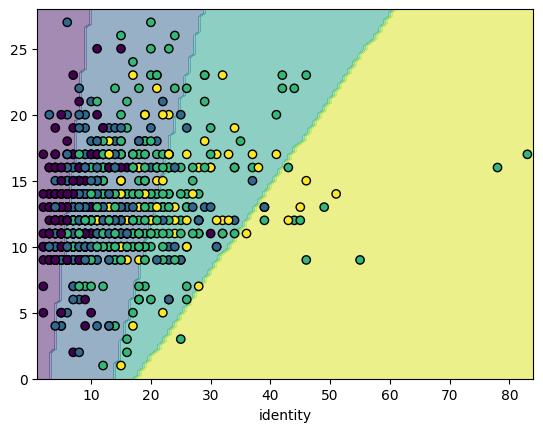

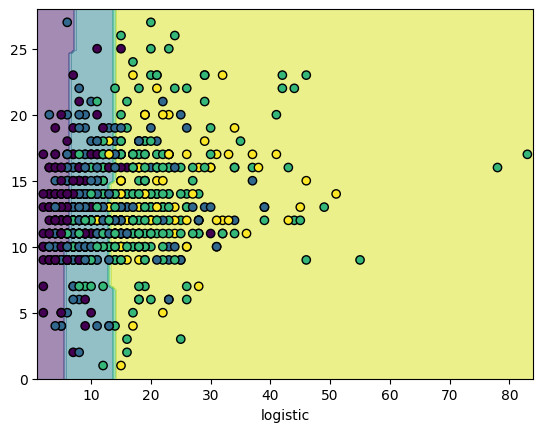

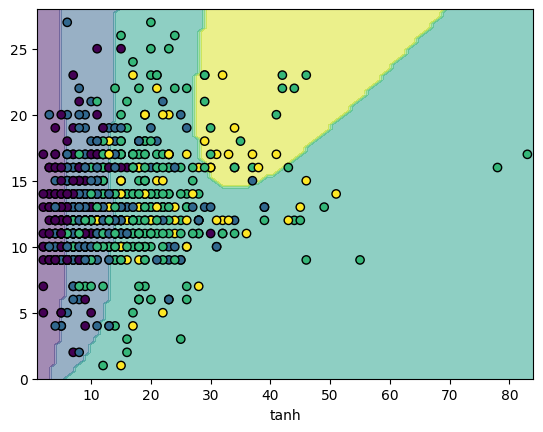

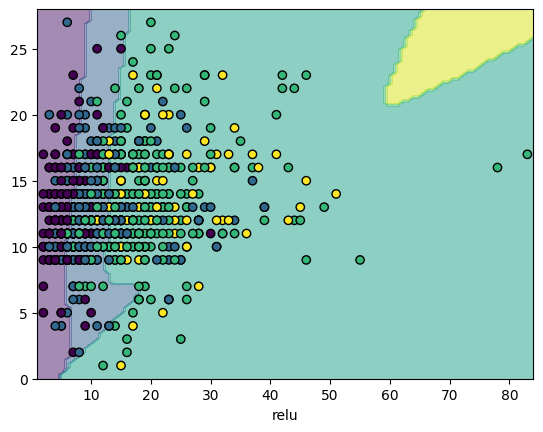

In [71]:
# Error calculation
it = 0
historgramData = []
for func in activation:
    clf = classifiers[it]
    print(func, " training acuracy: ", clf.score(X, y))
    print(func, " validation acuracy: ", clf.score(xTest, yTest))
    print(func, " training error: ", 1 - clf.score(X, y))
    print(func, " validation error: ", 1- clf.score(xTest, yTest))
    historgramData.append(clf.score(xTest, yTest))
    
    # Confusion matrix
    yPredictTrain = clf.predict(X)
    yPredictTest = clf.predict(xTest)
    
#     cfTrain = confusion_matrix(yTrain, yPredictTrain)
#     cfTest = confusion_matrix(yTest, yPredictTest)
#     pd.DataFrame(cfTest).to_csv(func+"MLP.csv")
    
#     # ploting graph
    disp = DecisionBoundaryDisplay.from_estimator(clf, X, response_method="predict", alpha=0.5, xlabel=func)
    disp.ax_.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k")
#     plt.show()
    it += 1

In [70]:
plt.figure("Accuracy based on activation function")
plt.bar(activation, height=historgramData)
plt.show()

NameError: name 'plt' is not defined

## AdaBoostClassifier
An AdaBoost [1] classifier is a meta-estimator that begins by fitting a classifier on the original dataset and then fits additional copies of the classifier on the same dataset but where the weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases.

In [72]:
# data to manipulate
xTrain = X_train
xTest = X_test
yTrain = y_train
yTest = y_test

# MLP AdaBoostClassifier
X = xTrain
y = yTrain
clf = AdaBoostClassifier(n_estimators=300, random_state=0)
clf.fit(X, y)

C:\Users\KAI\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier(n_estimators=300, random_state=0)

In [73]:
# Error calculation
print("training acuracy: ", clf.score(X, y))
print("validation acuracy: ", clf.score(xTest, yTest))
print("training error: ", 1 - clf.score(X, y))
print("validation error: ", 1- clf.score(xTest, yTest))

# Confusion matrix
yPredictTrain = clf.predict(X)
yPredictTest = clf.predict(xTest)

cfTrain = confusion_matrix(yTrain, yPredictTrain)
cfTest = confusion_matrix(yTest, yPredictTest)
# pd.DataFrame(cfTest).to_csv("AdaBoostClassifier.csv")

training acuracy:  0.44895833333333335
validation acuracy:  0.3900414937759336
training error:  0.5510416666666667
validation error:  0.6099585062240664


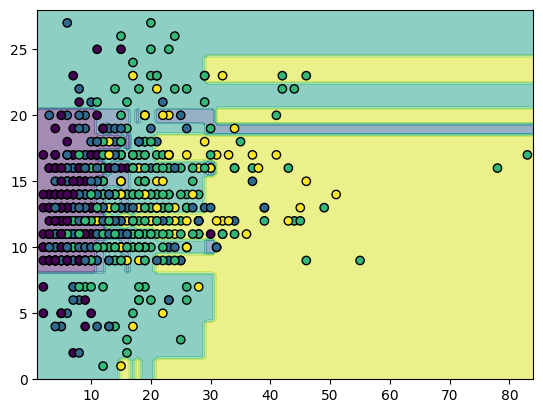

In [74]:
# ploting graph
disp = DecisionBoundaryDisplay.from_estimator(clf, X, response_method="predict", alpha=0.5)
disp.ax_.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k")

# Predict Data

## Knn with 18 nearest neighbours

In [79]:
# data to manipulate
xTrain = X_train
xTest = X_test
yTrain = y_train
yTest = y_test
# make = pd.DataFrame(data1Make)
# make = make.drop(0, axis=1)
# make = make.drop(10, axis=1)

# KNeighbors Classifier
X = xTrain
y = yTrain

clf = KNeighborsClassifier(n_neighbors=18)
clf.fit(X, y)

# Error calculation
print("training acuracy: ", clf.score(X, y))
print("validation acuracy: ", clf.score(xTest, yTest))
print("training error: ", 1 - clf.score(X, y))
print("validation error: ", 1- clf.score(xTest, yTest))

training acuracy:  0.575
validation acuracy:  0.5518672199170125
training error:  0.42500000000000004
validation error:  0.4481327800829875


C:\Users\KAI\AppData\Roaming\Python\Python39\site-packages\sklearn\neighbors\_classification.py:200: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [95]:
data = np.array(usabilityPredictData)
X_predict = np.array([data.T[3], data.T[4]], dtype=int).T

y = []
for x in X_predict:
    y.append(clf.predict(x.reshape(1,-1)))
y = np.array(y)
vidToUsability = {data.T[1][i]:y[i][0] for i in range(len(y))}

In [128]:
vidToUsability = {}
data = np.array(usabilityTrainData)
for i in range(len(data)):
    vidToUsability[data.T[1][i]] = data.T[5][i]

## save to new usability data csv

In [ ]:
saveLocation = "D:/Thesis/Video-Auslan-sorted"
dataFrame = pd.DataFrame
videoTitle = []
videoLocation = []
videoUsability = []
count = 0
for folder in os.listdir(saveLocation):
    for video in os.listdir(saveLocation + '/' + folder):
        videoTitle.append(video)
        videoLocation.append(saveLocation + '/' + folder + '/' + video)
        try:
            videoUsability.append(vidToUsability[video])
        except:
            videoUsability.append(0)
dataFrame = pd.DataFrame(np.array([videoTitle, videoLocation, videoUsability]).T)
dataFrame.to_csv('usabilityKNNPredicted.csv')

: 